In [5]:
# # # import pandas as pd
# # # from sklearn.feature_extraction.text import TfidfVectorizer
# # # from sklearn.decomposition import TruncatedSVD
# # # from sklearn.cluster import KMeans
# # # from sklearn.model_selection import train_test_split
# # # from sklearn.metrics import accuracy_score
# # # from sklearn.pipeline import Pipeline
# # # from nltk.corpus import stopwords
# # # from nltk.stem import PorterStemmer
# # # from sklearn.preprocessing import LabelEncoder
# # # from sklearn.linear_model import LogisticRegression

# # # # Load data
# # # data = pd.read_csv('suicide.csv')

# # # # Preprocessing
# # # stop_words = set(stopwords.words('english'))
# # # stemmer = PorterStemmer()

# # # def preprocess_text(text):
# # #     text = text.lower()
# # #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# # #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# # #     return text

# # # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # # Feature extraction
# # # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# # # # Dimensionality reduction
# # # svd = TruncatedSVD(n_components=100)
# # # svd_matrix = svd.fit_transform(tfidf_matrix)

# # # # Clustering
# # # kmeans = KMeans(n_clusters=2, random_state=42)
# # # kmeans.fit(svd_matrix)

# # # # Assign cluster labels
# # # data['cluster_label'] = kmeans.labels_

# # # # Split data into train and test sets
# # # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # # Train classifier
# # # classifier = LogisticRegression()
# # # classifier.fit(X_train, y_train)

# # # # Predictions
# # # y_pred = classifier.predict(X_test)

# # # # Evaluate classifier
# # # accuracy = accuracy_score(y_test, y_pred)
# # # print("Accuracy:", accuracy)

# # import pandas as pd
# # from sklearn.feature_extraction.text import CountVectorizer
# # from sklearn.decomposition import TruncatedSVD
# # from sklearn.cluster import KMeans
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # from sklearn.pipeline import Pipeline
# # from nltk.corpus import stopwords
# # from nltk.stem import PorterStemmer
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.linear_model import LogisticRegression

# # # Load data
# # data = pd.read_csv('suicide.csv')

# # # Preprocessing
# # stop_words = set(stopwords.words('english'))
# # stemmer = PorterStemmer()

# # def preprocess_text(text):
# #     text = text.lower()
# #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# #     return text

# # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # Feature extraction (Bag of Words)
# # count_vectorizer = CountVectorizer(max_features=1000)
# # bow_matrix = count_vectorizer.fit_transform(data['clean_text'])

# # # Dimensionality reduction
# # svd = TruncatedSVD(n_components=100)
# # svd_matrix = svd.fit_transform(bow_matrix)

# # # Clustering
# # kmeans = KMeans(n_clusters=2, random_state=42)
# # kmeans.fit(svd_matrix)

# # # Assign cluster labels
# # data['cluster_label'] = kmeans.labels_

# # # Split data into train and test sets
# # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # Train classifier
# # classifier = LogisticRegression()
# # classifier.fit(X_train, y_train)

# # # Predictions
# # y_pred = classifier.predict(X_test)

# # # Evaluate classifier
# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)


# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Evaluate clustering results (compare with Suicide labels)
# # Implement your evaluation steps here

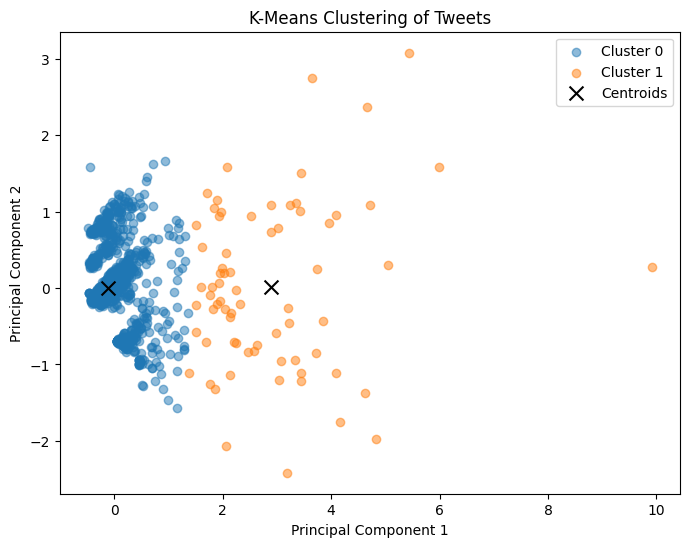

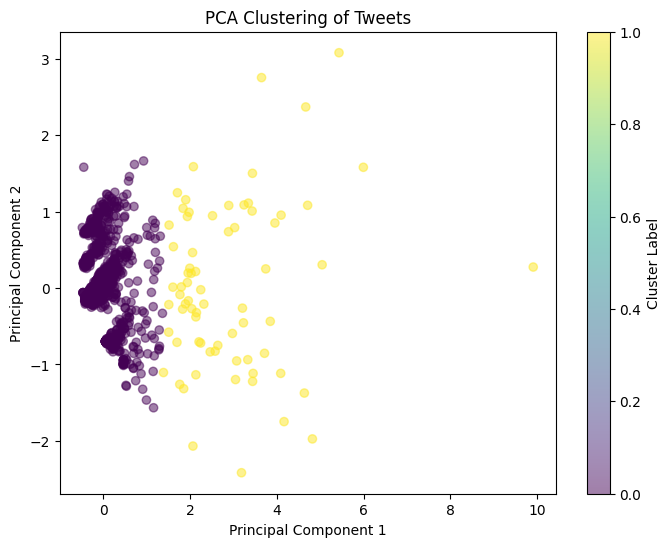

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)


# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('K-Means Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

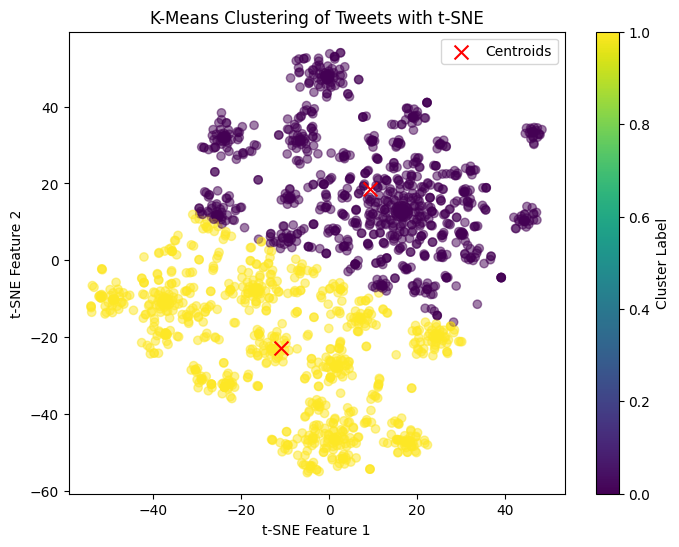

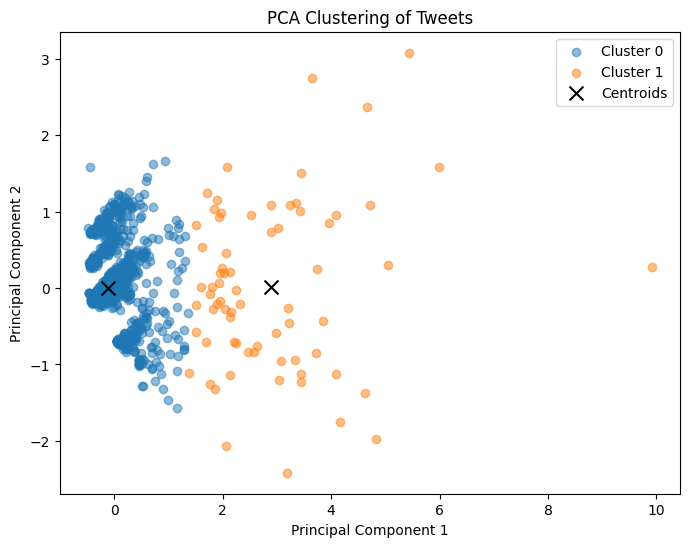

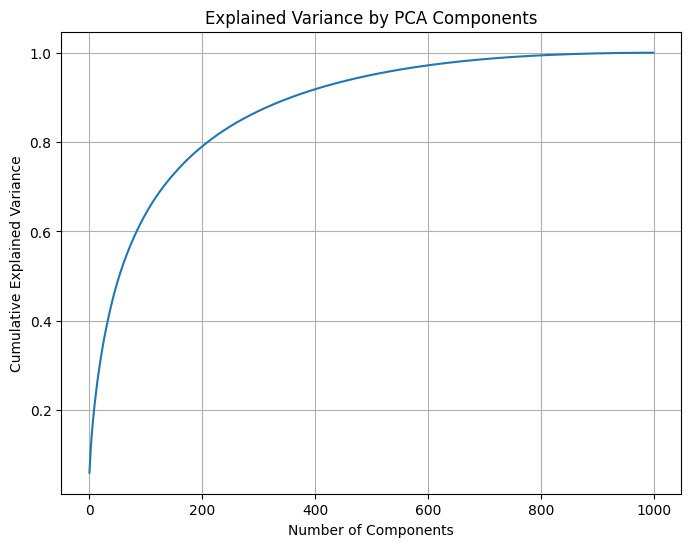

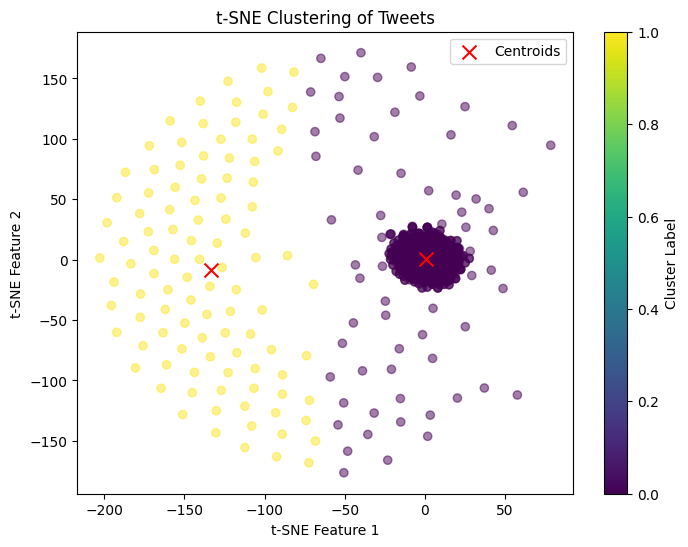

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame with the 'Tweet' column available

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)
data['cluster_label'] = kmeans.labels_

# PCA Clustering Plot
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Explained Variance Plot
pca_full = PCA().fit(bow_matrix.toarray())
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()



# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

25      johnshopkins bloodstain carpet ready gooo http...
43                             brushin mah teef secularly
70      stacyonbob ate candy cigarettes eat wax drink ...
100     home school yay bad actually nice dinner grace...
121                 fussy age long female change rule lol
                              ...                        
1757       secbarbie even figure turkey pretty close iraq
1765                 elliottcable prefer poopdiary meself
1766                            ooh snowboardlite fun app
1770                            missxu penclip soooo cool
1773    totally bought high school musical today mean ...
Name: Tweet, Length: 102, dtype: object

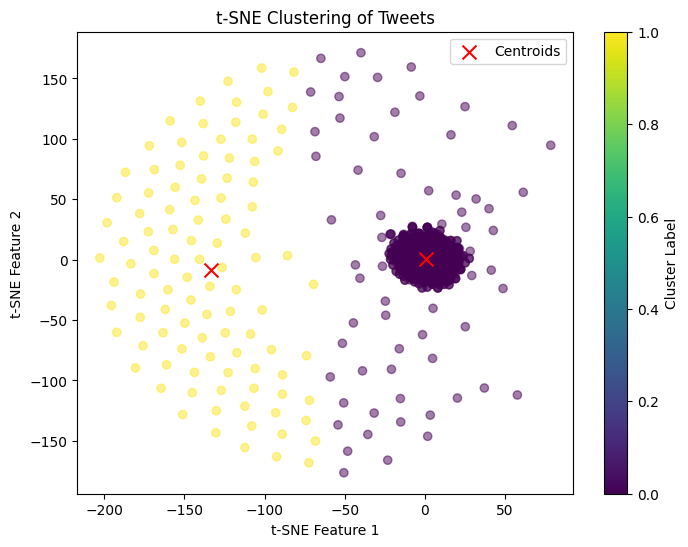

In [8]:
# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

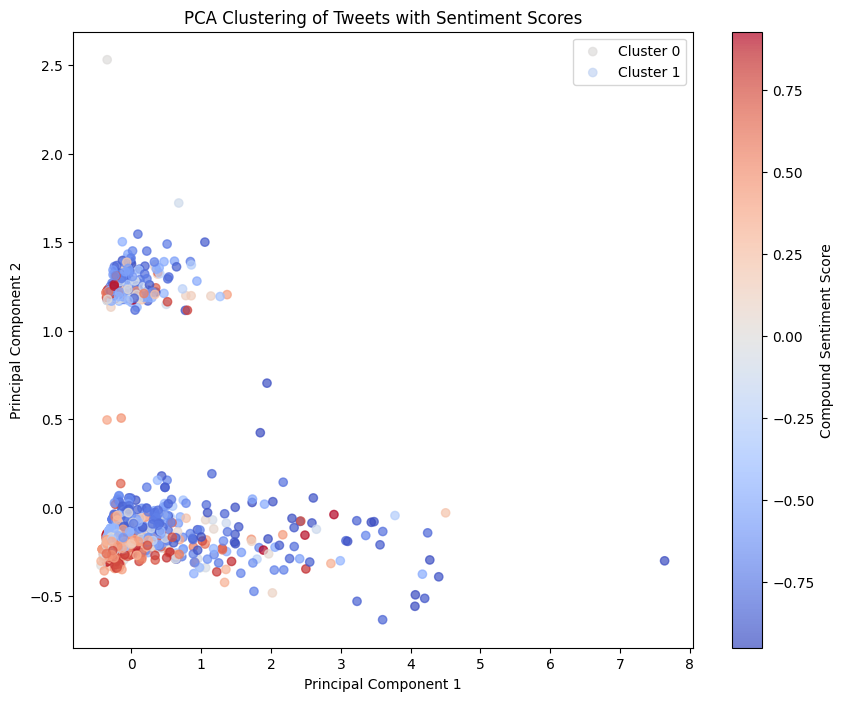

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
data['compound_score'] = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)

# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters with sentiment scores
plt.figure(figsize=(10, 8))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                c=data[data['cluster_label'] == cluster_label]['compound_score'], 
                cmap='coolwarm', alpha=0.7, label=f'Cluster {cluster_label}')

plt.title('PCA Clustering of Tweets with Sentiment Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Compound Sentiment Score')
plt.legend()
plt.show()

In [15]:
# Anything

In [16]:
print('hello')

hello


NaN values found in 'Tweet' column. Consider removing or replacing them before proceeding.


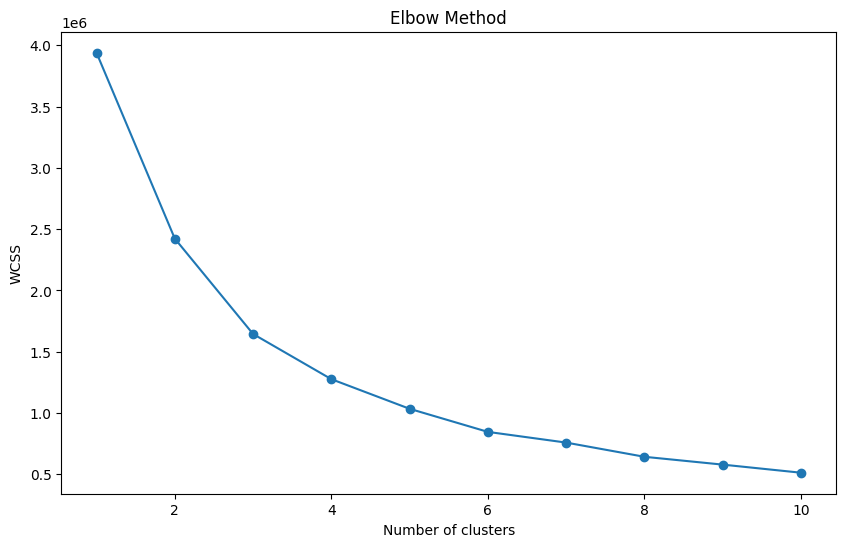

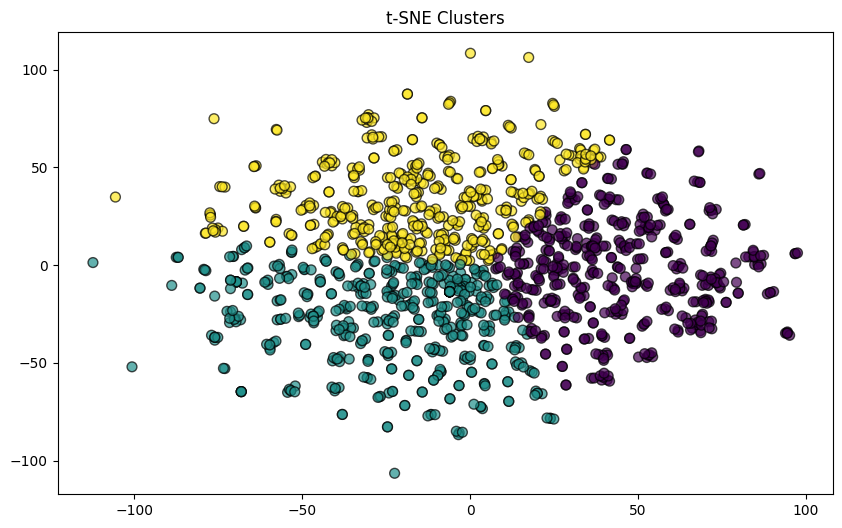

In [23]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset, ignoring the suicide indication column
data = pd.read_csv('suicide.csv', usecols=['Tweet'])

# Initialize VADER for sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# Compute VADER compound scores
data['vader_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
if data['Tweet'].isnull().any():
    print("NaN values found in 'Tweet' column. Consider removing or replacing them before proceeding.")
data = data.dropna(subset=['Tweet'])


# Vectorize tweets using Bag of Words
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['Tweet']).toarray()

# Combine BoW features with VADER scores
vader_scores = data['vader_score'].values.reshape(-1, 1)
X_combined = np.hstack((X_bow, vader_scores))

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_combined)

# Split into training and validation sets
X_train, X_validation = train_test_split(X_standardized, test_size=0.2, random_state=42)

# Apply t-SNE to the training data
tsne = TSNE(n_components=2, perplexity=5, random_state=99)
X_train_tsne = tsne.fit_transform(X_train)

# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow plot, choose the optimal number of clusters
n_clusters_optimal = 3  # Example; adjust based on your plot

# Perform k-means clustering
kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=42)
clusters = kmeans_final.fit_predict(X_train_tsne)

# Visualization of the t-SNE clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('t-SNE Clusters')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for binary classification
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Example for regression
y_pred_continuous = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_continuous))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_continuous))
print("R-Squared:", r2_score(y_test, y_pred_continuous))


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
# data = pd.read_csv('tweets.csv')  # Replace this with your actual CSV file path

# Assuming 'data' has a column 'tweets' with the text of the tweets
# and 'labels' with the correct sentiment label (positive, negative, neutral)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each tweet and get the compound score
data['vader_score'] = data['tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Now, 'vader_score' can be used as a feature for your model
X = data['vader_score'].values.reshape(-1, 1)  # Features matrix
y = data['labels'].values                      # Target vector

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = RandomForestClassifier(random_state=42)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv is the number of folds

# Print the accuracy for each fold
print(scores)

# Average accuracy
print(f"Average Cross-Validation Accuracy: {scores.mean()}")

# Now, fit the model on the entire training data and evaluate on the test set
model.fit(X_train, y_train)
final_score = model.score(X_test, y_test)
print(f"Final Evaluation on Test Set: {final_score}")
